In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing the dataset
df_train = pd.read_csv("black_friday_train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# importing the test dataset
df_test = pd.read_csv("black_friday_test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


# Here we are combining the train and test data as its kaggle dataset and to do the preprocess faster 

In [4]:
df = df_train.append(df_test)
df.head()

C:\Users\91891\anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null object
City_Category                 783667 non-null object
Gender                        783667 non-null object
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
User_ID                       783667 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [6]:
df.describe()

,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_ID
count,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000,7.836670e+05
mean,0.409777,8.079300,5.366196,9.844506,12.668605,9263.968713,1.003029e+06
std,0.491793,6.522206,3.878160,5.089093,4.125510,5023.065394,1.727267e+03
min,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000,1.000001e+06
25%,0.000000,2.000000,1.000000,5.000000,9.000000,5823.000000,1.001519e+06
50%,0.000000,7.000000,5.000000,9.000000,14.000000,8047.000000,1.003075e+06
75%,1.000000,14.000000,8.000000,15.000000,16.000000,12054.000000,1.004478e+06
max,1.000000,20.000000,20.000000,18.000000,18.000000,23961.000000,1.006040e+06


In [7]:
df.columns

Index(['Age', 'City_Category', 'Gender', 'Marital_Status', 'Occupation',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Product_ID', 'Purchase', 'Stay_In_Current_City_Years', 'User_ID'],
      dtype='object')

- Uer_id is just a unique number , there is to use of the column 

In [8]:
df.drop("User_ID",axis=1,inplace=True)

In [9]:
df.columns

Index(['Age', 'City_Category', 'Gender', 'Marital_Status', 'Occupation',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Product_ID', 'Purchase', 'Stay_In_Current_City_Years'],
      dtype='object')

# Handling Categorical Columns

# Gender

In [10]:
df["Gender"] = df["Gender"].map({"F":0,"M":1})
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years
0,0-17,A,0,0,10,3,NaN,NaN,P00069042,8370.0,2
1,0-17,A,0,0,10,1,6.0,14.0,P00248942,15200.0,2
2,0-17,A,0,0,10,12,NaN,NaN,P00087842,1422.0,2
3,0-17,A,0,0,10,12,14.0,NaN,P00085442,1057.0,2
4,55+,C,1,0,16,8,NaN,NaN,P00285442,7969.0,4+


In [13]:
df["Gender"].head()

0    0
1    0
2    0
3    0
4    1
Name: Gender, dtype: int64

# Age

In [14]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [15]:
df["Age"] = df["Age"].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [16]:
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years
0,1,A,0,0,10,3,NaN,NaN,P00069042,8370.0,2
1,1,A,0,0,10,1,6.0,14.0,P00248942,15200.0,2
2,1,A,0,0,10,12,NaN,NaN,P00087842,1422.0,2
3,1,A,0,0,10,12,14.0,NaN,P00085442,1057.0,2
4,7,C,1,0,16,8,NaN,NaN,P00285442,7969.0,4+


# City Category

In [18]:
df_city = pd.get_dummies(df["City_Category"],drop_first=True)
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [19]:
df = pd.concat([df,df_city],axis =1)
df.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,1,A,0,0,10,3,NaN,NaN,P00069042,8370.0,2,0,0
1,1,A,0,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,1,A,0,0,10,12,NaN,NaN,P00087842,1422.0,2,0,0
3,1,A,0,0,10,12,14.0,NaN,P00085442,1057.0,2,0,0
4,7,C,1,0,16,8,NaN,NaN,P00285442,7969.0,4+,0,1


In [20]:
df.drop(["City_Category"],axis=1,inplace=True)

In [21]:
df.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,NaN,NaN,P00069042,8370.0,2,0,0
1,1,0,0,10,1,6.0,14.0,P00248942,15200.0,2,0,0
2,1,0,0,10,12,NaN,NaN,P00087842,1422.0,2,0,0
3,1,0,0,10,12,14.0,NaN,P00085442,1057.0,2,0,0
4,7,1,0,16,8,NaN,NaN,P00285442,7969.0,4+,0,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null int64
Gender                        783667 non-null int64
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
B                             783667 non-null uint8
C                             783667 non-null uint8
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


# Stay_In_Current_City_Years

In [38]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [39]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].str.replace("+","")

In [40]:
df["Stay_In_Current_City_Years"].head()

0    2
1    2
2    2
3    2
4    4
Name: Stay_In_Current_City_Years, dtype: object

In [41]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype(int)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null int64
Gender                        783667 non-null int64
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null int32
B                             783667 non-null uint8
C                             783667 non-null uint8
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 64.3+ MB


# Coverting Object into int

In [43]:
df["B"] = df["B"].astype(int)
df["C"] = df["C"].astype(int)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null int64
Gender                        783667 non-null int64
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null int32
B                             783667 non-null int32
C                             783667 non-null int32
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


# Handling Missing Values

In [23]:
df.isnull().sum()

Age                                0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
B                                  0
C                                  0
dtype: int64

- List compression method

In [24]:
[feature for feature in df.columns if df[feature].isnull().sum()>0]

['Product_Category_2', 'Product_Category_3', 'Purchase']

In [25]:
missing_features={}
for feature in df.columns:
    if df[feature].isnull().sum()>0:
        missing_features[feature] = df[feature].isnull().sum()

In [26]:
missing_features

{'Product_Category_2': 245982,
 'Product_Category_3': 545809,
 'Purchase': 233599}

In [30]:
df["Product_Category_2"].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [31]:
df["Product_Category_3"].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [32]:
df["Product_Category_2"].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [34]:
df["Product_Category_3"].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [33]:
df["Product_Category_2"].mode()

0    8.0
dtype: float64

In [ ]:
df["Product_Category_3"].mode()

# Has these are discrete varibles , we can replace with mode 

In [35]:
df["Product_Category_2"] = df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])
df["Product_Category_3"] = df["Product_Category_3"].fillna(df["Product_Category_3"].mode()[0])

In [36]:
df["Product_Category_2"].isnull().sum()

0

In [37]:
df["Product_Category_3"].isnull().sum()

0

# Visualisation

# Age vs Purchase

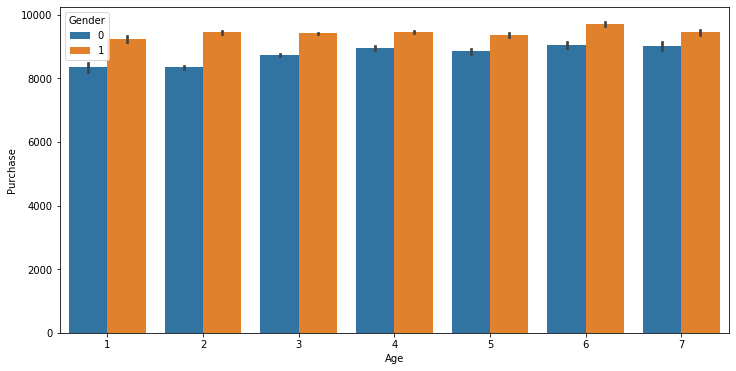

In [56]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (12,6)
sns.barplot("Age","Purchase" ,"Gender", data = df)
plt.show()

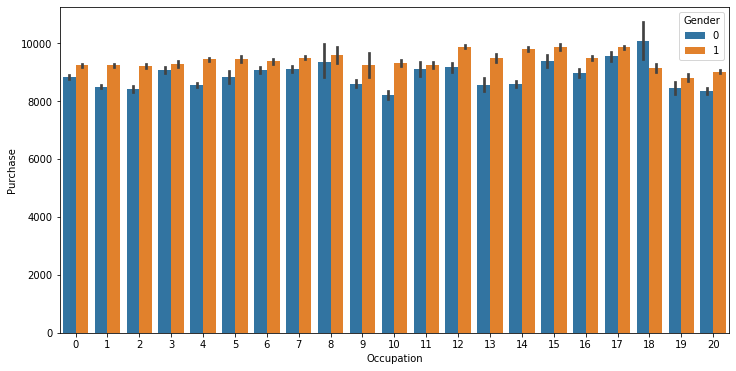

In [57]:
sns.barplot("Occupation","Purchase" ,"Gender", data = df)
plt.show()

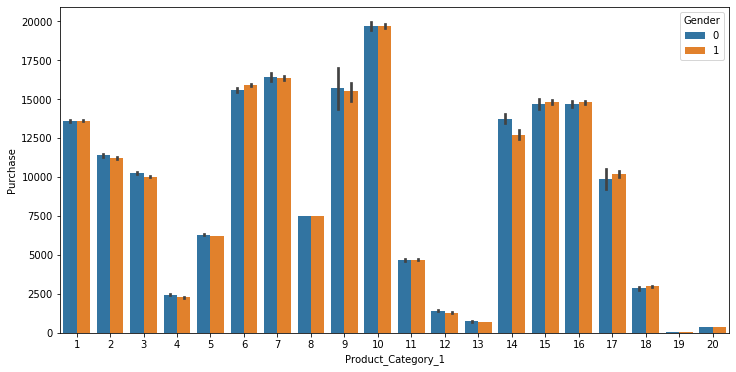

In [58]:
sns.barplot("Product_Category_1","Purchase" ,"Gender", data = df)
plt.show()

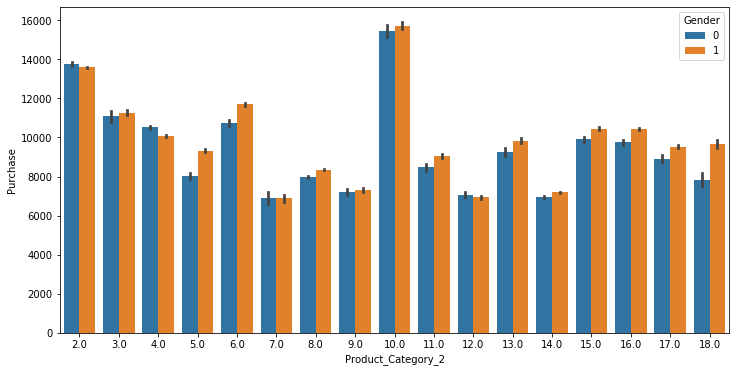

In [59]:
sns.barplot("Product_Category_2","Purchase" ,"Gender", data = df)
plt.show()

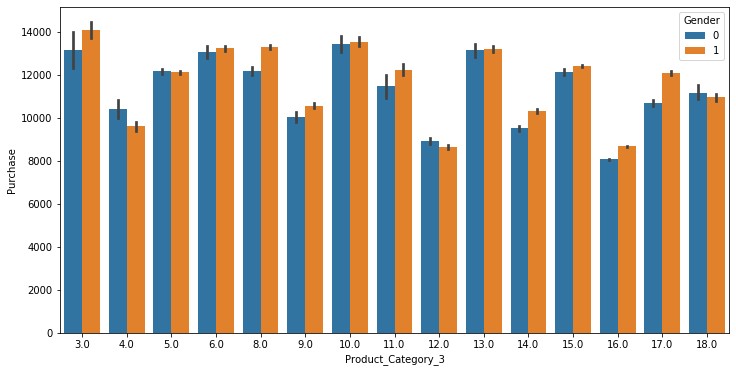

In [60]:
sns.barplot("Product_Category_3","Purchase" ,"Gender", data = df)
plt.show()

In [89]:
df.corr()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years,B,C
Age,1.000000,-0.004758,0.310747,0.090882,0.060336,0.041716,0.036721,0.015839,-0.004968,-0.016881,0.110302
Gender,-0.004758,1.000000,-0.010945,0.116505,-0.046208,-0.011851,-0.006651,0.060346,0.015026,-0.005399,-0.000180
Marital_Status,0.310747,-0.010945,1.000000,0.023563,0.019579,0.012192,0.013808,-0.000463,-0.012871,-0.002804,0.034377
Occupation,0.090882,0.116505,0.023563,1.000000,-0.008441,0.001501,-0.001576,0.020833,0.028488,-0.011721,0.035255
Product_Category_1,0.060336,-0.046208,0.019579,-0.008441,1.000000,0.286502,0.319209,-0.343703,-0.003518,-0.003863,-0.012870
Product_Category_2,0.041716,-0.011851,0.012192,0.001501,0.286502,1.000000,0.463528,-0.128651,-0.000081,-0.003944,-0.000443
Product_Category_3,0.036721,-0.006651,0.013808,-0.001576,0.319209,0.463528,1.000000,-0.185945,-0.000308,0.004291,-0.020687
Purchase,0.015839,0.060346,-0.000463,0.020833,-0.343703,-0.128651,-0.185945,1.000000,0.005422,-0.019098,0.061012
Stay_In_Current_City_Years,-0.004968,0.015026,-0.012871,0.028488,-0.003518,-0.000081,-0.000308,0.005422,1.000000,0.011011,0.011007
B,-0.016881,-0.005399,-0.002804,-0.011721,-0.003863,-0.003944,0.004291,-0.019098,0.011011,1.000000,-0.572552


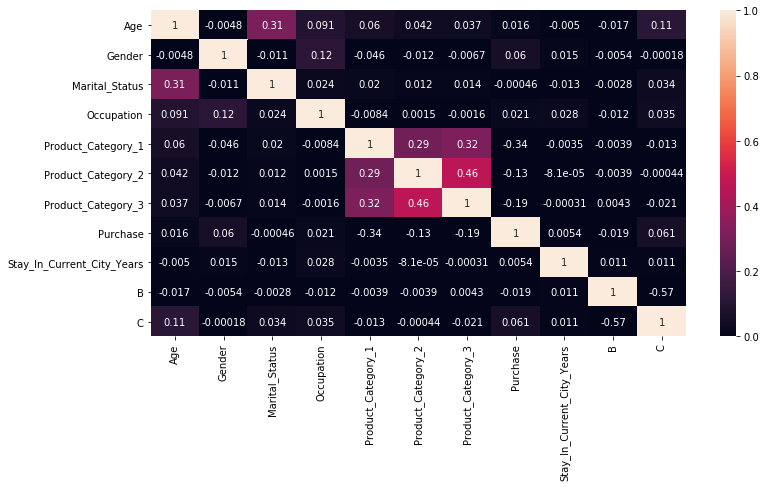

In [90]:
sns.heatmap(df.corr(),vmin=0, vmax=1,annot=True)

# Feature Scaling 

In [76]:
df.drop(["Product_ID"],axis=1,inplace=True)

In [77]:
df_test = df[df["Purchase"].isnull()]

In [78]:
df_test.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years,B,C
0,5,1,1,7,1,11.0,16.0,NaN,2,1,0
1,3,1,0,17,3,5.0,16.0,NaN,0,0,1
2,4,0,1,1,5,14.0,16.0,NaN,4,1,0
3,4,0,1,1,4,9.0,16.0,NaN,4,1,0
4,3,0,0,1,4,5.0,12.0,NaN,1,0,1


In [79]:
df_train = df[~df["Purchase"].isnull()]
df_train.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,8.0,16.0,8370.0,2,0,0
1,1,0,0,10,1,6.0,14.0,15200.0,2,0,0
2,1,0,0,10,12,8.0,16.0,1422.0,2,0,0
3,1,0,0,10,12,14.0,16.0,1057.0,2,0,0
4,7,1,0,16,8,8.0,16.0,7969.0,4,0,1


In [80]:
X =  df_train.drop(["Purchase"],axis=1)
y = df_train["Purchase"]

In [81]:
X.head()

,Age,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Stay_In_Current_City_Years,B,C
0,1,0,0,10,3,8.0,16.0,2,0,0
1,1,0,0,10,1,6.0,14.0,2,0,0
2,1,0,0,10,12,8.0,16.0,2,0,0
3,1,0,0,10,12,14.0,16.0,2,0,0
4,7,1,0,16,8,8.0,16.0,4,0,1


In [82]:
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [83]:
X.shape

(550068, 10)

In [84]:
y.shape

(550068,)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [87]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

# Training

In [93]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
predicted = linear_regression.predict(X_test)

In [95]:
predicted

array([ 3220.03430911,  2008.95660012, -9697.36491459, ...,
       -1340.51346185,  2803.68500153,  1634.46455684])

In [96]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,predicted)

In [97]:
MAE

13818.976720890858